In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None # pour afficher toutes les colonnes
pd.options.display.max_rows = None # pour afficher toutes les lignes

web = pd.read_excel('web.xlsx', index_col=0) 
erp = pd.read_excel('erp.xlsx', index_col=0)
liaison = pd.read_excel('liaison.xlsx', index_col=0)

# ANALYSE DES CLES AVANT JOINTURE

## lecture des données

In [2]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
Index,,,,,,,,,,,,,,,,,,,,,,,,
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [3]:
# colonne sku = clé primaire
# tableau contient le nombre de ventes (colonne total_sales)

In [4]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
Index,,,,,
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
# clé primaire = colonne product_id
# tableau contient le prix des produits

In [6]:
liaison.head()

,product_id,id_web
Index,,
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [7]:
# tableau de liaison entre les 2 tableaux

In [8]:
# Le CA calculé sera uniquement celui réalisé via Internet car on ne dispose...
# ...du nombre de ventes que pour le web.

## TABLEAU WEB : changement nom colonne 'sku' dans tableau web

In [9]:
web = web.rename(columns={'sku': 'id_web'})

## TABLEAU WEB : nombre de lignes

In [10]:
len(web)

1513

## TABLEAU WEB : taux de données manquantes de la colonne id_web

In [11]:
tx = (web['id_web'].isna().sum()/len(web))*100
tx

5.617977528089887

## TABLEAU WEB : nombre de lignes où id_web = NaN

In [12]:
web['id_web'].isna().sum()

85

## TABLEAU WEB : analyse des id_web = NaN

In [13]:
# isolation des données

In [14]:
web_id_nan = web[web['id_web'].isna()]

In [15]:
# description des données

In [16]:
web_id_nan.describe(include='all', datetime_is_numeric=True)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,0,85.0,85.0,85.0,2.0,2.0,2,2.0,2,2,2,2,2,2,2,2,2,2,2.0,2,2.0,2,0,2.0
unique,0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,2,1,1,1,2,NaN,NaN,NaN,2,NaN,1,0,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,NaN,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,1,1,2,2,2,1,NaN,NaN,NaN,1,NaN,2,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-08-04 11:45:33,2018-08-04 09:45:33,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-02 13:24:08,2019-11-02 12:24:08,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-08-02 11:56:28,2018-08-02 09:56:28,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-02 13:24:04.500000256,2019-11-02 12:24:04.500000256,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-08-04 11:45:33,2018-08-04 09:45:33,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-02 13:24:08,2019-11-02 12:24:08,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-08-06 11:34:38,2018-08-06 09:34:38,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-02 13:24:11.499999744,2019-11-02 12:24:11.499999744,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,NaN,0.0,NaN,NaN,0.0


In [17]:
# 2 valeurs renseignées dans colonne 'total_sales' essentielle pour calculer le chiffre d'affaires
# Donc isolation des lignes qui ne sont pas NaN dans colonne total_sales

In [18]:
web_id_nan[pd.notna(web_id_nan['total_sales'])]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
Index,,,,,,,,,,,,,,,,,,,,,,,,
470,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
# ces 2 produits ont été mis en vente mais pas de ventes (colonne total_sales = 0)

In [20]:
# toutes les lignes sans id_web n'ont pas de ventes (soit NaN, soit 0 dans total_sales) => on ne s'en servira pas

In [21]:
# suppression des lignes où id_web = donnée manquante

In [22]:
web = web[web['id_web'].notna()]

In [23]:
# vérification de l'isolation (1513 lignes au total - 85 lignes sans id_web = 1428)

In [24]:
len(web)

1428

### TABLEAU WEB : analyse des doublons dans colonne id_web

In [25]:
# description des données

In [26]:
web.describe(include='all', datetime_is_numeric=True)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428.0,1428.0,1428.0,1428.0,1428.0,1428.000000,714,1428.000000,1428,1428,1428,714,1428,1428,1428,1428,1428,1428,1428.0,1428,1428.0,1428,714,1428.0
unique,714.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,711,677,1,1,1,714,NaN,NaN,NaN,1428,NaN,2,1,NaN
top,14332.0,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,Domaine Hauvette IGP Alpilles Jaspe 2017,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,domaine-de-montgilet-anjou-rouge-2016-2,NaN,NaN,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,NaN,product,image/jpeg,NaN
freq,2.0,NaN,NaN,NaN,NaN,NaN,714,NaN,NaN,NaN,4,12,1428,1428,1428,2,NaN,NaN,NaN,1,NaN,714,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,2018-08-22 03:57:52.950981120,2018-08-22 02:29:08.581233408,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-20 21:45:25.694677760,2020-06-20 19:51:53.929971456,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,2018-02-27 14:18:27,2018-02-27 13:18:27,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-18 10:45:06,2020-06-18 08:45:06,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,2019-01-31 14:39:08,2019-01-31 13:39:08,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25 10:35:02,2020-08-25 08:35:02,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,0.0,NaN,0.0,NaN,NaN,0.0


In [27]:
# il y a 714 valeurs uniques pour 1428 valeurs dans colonne id_web. 714*2=1428 :
# toutes les lignes sont en doublon

In [28]:
# isolation des doublons

In [29]:
doublons = web.loc[web['id_web'].duplicated(keep=False),:]

In [30]:
# classement impossible sur id_web (il y a des valeurs non numériques)
# tri par 'post_date' pr comparer les doublons car hautement improbable
# ...qu'un post ait exactement la même date et la même heure à la seconde près

In [31]:
doublons.sort_values('post_date').head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
Index,,,,,,,,,,,,,,,,,,,,,,,,
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
801,15300,0,0,0,0.0,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,NaN,publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


###### On s'attend à trouver des doublons avec exactement les mêmes valeurs par ligne. Mais :

tax_status : taxable ou NaN.
Il faudrait investiguer pour s'assurer qu'il s'agit bien d'un doublon et pas d'une fraude car cela pourrait vouloir dire qu'une partie du CA échappe à la fiscalité

post_excerpt : description du produit ou NaN

post_mime_type :
les lignes non-taxables = 'image/jpeg' mais les lignes taxables = NaN

post_type :
Lignes taxables = product.
Lignes non-taxables avec 'image/jpeg' dans post_mime_type = attachment.
On peut penser que la ligne non-taxable est "attachée" à la ligne principale, celle qui est taxable, car elle contient le fichier image.

1 des 2 doublons a des infos à conserver sur 'post_excerpt' et est taxable sur 'tax_status'.
L'autre, sans pouvoir investiguer davantage, est probablement la ligne qui permet d'attacher l'image au produit :
suppression des lignes avec NaN dans colonne 'post_excerpt'

In [32]:
# export des données pour analyse

In [33]:
web.to_excel('output.xlsx')

In [34]:
# suppression des doublons par élimination des NaN dans la colonne tax_status

In [35]:
web = web.dropna(subset=['tax_status'])

In [36]:
# vérification de la suppression

In [37]:
web.describe(include='all', datetime_is_numeric=True)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,714.0,714.0,714.0,714.0,714.0,714.000000,714,714.000000,714,714,714,714,714,714,714,714,714,714,714.0,714,714.0,714,0,714.0
unique,714.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,711,677,1,1,1,714,NaN,NaN,NaN,714,NaN,1,0,NaN
top,14332.0,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,domaine-de-montgilet-anjou-rouge-2016-2,NaN,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,NaN,NaN
freq,1.0,NaN,NaN,NaN,NaN,NaN,714,NaN,NaN,NaN,2,12,714,714,714,1,NaN,NaN,NaN,1,NaN,714,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,2018-08-22 03:57:52.950980096,2018-08-22 02:29:08.581233408,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-20 21:45:25.694678784,2020-06-20 19:51:53.929972992,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-18 18:32:35,2020-06-18 16:32:35,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,0.0,NaN,0.0,NaN,NaN,0.0


In [38]:
# 714 valeurs dans colonne id_web pour 714 valeurs uniques : OK

### TABLEAU WEB : analyse du type de la colonne id_web

In [39]:
web.dtypes

id_web                       object
virtual                       int64
downloadable                  int64
rating_count                  int64
average_rating              float64
total_sales                 float64
tax_status                   object
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_status                  object
comment_status               object
ping_status                  object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
post_parent                 float64
guid                         object
menu_order                  float64
post_type                    object
post_mime_type               object
comment_count               float64
dtype: object

In [40]:
# id_web = object alors qu'on attend du numérique. Quelles sont les valeurs non-numériques ?

In [41]:
df = web[pd.to_numeric(web['id_web'], errors='coerce').isnull()]
df

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
Index,,,,,,,,,,,,,,,,,,,,,,,,
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [42]:
# 13127-1 & bon-cadeau-25-euros en doublon

In [43]:
# pour la clé 13127-1, il n'y a pas de ventes donc suppression

In [44]:
web.drop(index=797,inplace=True)

In [45]:
# vérification de la suppression :
# on attend plus que bon-cadeau-25-euros en valeur non-numérique dans colonne id_web)

In [46]:
df = web[pd.to_numeric(web['id_web'], errors='coerce').isnull()]
df

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
Index,,,,,,,,,,,,,,,,,,,,,,,,
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [47]:
# pour la clé bon-cadeau-25-euros :
# il s'agit d'un moyen de paiement et pas d'une facturation : à supprimer.

In [48]:
# suppression de la ligne avec id_web = bon-cadeau dans tableau web

In [49]:
# web.drop(index=0, inplace=True)

In [50]:
# vérification de la suppression

In [51]:
web[web['id_web'] =='bon-cadeau-25-euros']

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
Index,,,,,,,,,,,,,,,,,,,,,,,,
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [52]:
# dans le tableau liaison, recherche de la clé du tableau erp correspondant à :
# id_web = 'bon-cadeau-25-euros'

In [53]:
liaison[liaison['id_web'] == 'bon-cadeau-25-euros']

,product_id,id_web
Index,,
443,4954,bon-cadeau-25-euros


In [54]:
# suppression de la ligne

In [55]:
############# liaison.drop(index=443, inplace=True)

In [56]:
# Vérification de la suppression

In [57]:
liaison[liaison['id_web'] == 'bon-cadeau-25-euros']

,product_id,id_web
Index,,
443,4954,bon-cadeau-25-euros


In [58]:
# dans le tableau erp, recherche de product_id = 4954

In [59]:
erp[erp['product_id'] == 4954]

,product_id,onsale_web,price,stock_quantity,stock_status
Index,,,,,
443,4954,1,25.0,0,instock


In [60]:
# Suppression de la ligne

In [61]:
############# erp.drop(index=443, inplace=True)

In [62]:
# vérification de la suppression de la ligne

In [63]:
erp[erp['product_id'] == 4954]

,product_id,onsale_web,price,stock_quantity,stock_status
Index,,,,,
443,4954,1,25.0,0,instock


### TABLEAU WEB : nombre de lignes valide

In [64]:
valid_lines_web = len(web)
valid_lines_web

713

### TABLEAU ERP : nombre de lignes

In [65]:
len(erp)

825

### TABLEAU ERP : taux de données manquantes de la colonne product_id

In [66]:
erp['product_id'].isna().sum() / len(erp) * 100

0.0

In [67]:
# pas de données manquantes

### TABLEAU ERP : analyse des doublons de la colonne product_id

In [68]:
doublons = erp.loc[erp['product_id'].duplicated(keep=False),:]
doublons

,product_id,onsale_web,price,stock_quantity,stock_status
Index,,,,,


In [69]:
# pas de doublons dans la colonne product_id

### TABLEAU ERP : nombre de lignes valide

In [70]:
valid_lines_erp = len(erp)
valid_lines_erp

825

### TABLEAU LIAISON : nombre de lignes

In [71]:
len(liaison)

825

### TABLEAU LIAISON : taux de données manquantes des colonnes id_web et product_id

In [72]:
print('Taux de données manquantes:','\n',(liaison.isna().sum()/len(liaison))*100)

Taux de données manquantes: 
 product_id     0.000000
id_web        11.030303
dtype: float64


### TABLEAU LIAISON : nombre de lignes où id_web = NaN

In [73]:
liaison['id_web'].isna().sum()

91

###### il faudra reconstituer le nombre total de ventes pour les lignes sans donnée dans id_web car l'information est dans le tableau web

### TABLEAU LIAISON : analyse des doublons dans les 2 colonnes

#### colonne product_id

In [74]:
# isolation des doublons

In [75]:
doublons = liaison.loc[liaison['product_id'].duplicated(keep=False),:]
doublons

,product_id,id_web
Index,,


In [76]:
# pas de doublon dans la colonne product_id

#### colonne id_web

In [77]:
# isolation des doublons

In [78]:
doublons = liaison.loc[liaison['id_web'].duplicated(keep=False),:]
doublons.head()

,product_id,id_web
Index,,
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN


In [79]:
# vérification qu'il n'y a que des NaN

In [80]:
doublons['id_web'].value_counts()

Series([], Name: id_web, dtype: int64)

In [81]:
# suppression des NaN

In [82]:
doublons.dropna(subset=['id_web'],inplace=True)

<ipython-input-82-7407dd60c503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doublons.dropna(subset=['id_web'],inplace=True)


In [83]:
# vérification de la suppression

In [84]:
doublons

,product_id,id_web
Index,,


In [85]:
# vérification validée, les doublons étaient tous des NaN

### TABLEAU LIAISON : nombre de lignes valides

In [86]:
valid_lines_liaison = len(liaison)
valid_lines_liaison

825

# jointure

### jointure liaison-erp

In [87]:
# fusion des tableaux

In [88]:
df = liaison.merge(erp, how='outer', on='product_id', indicator=True)

In [89]:
# vérification de la fusion

In [90]:
df.describe(include='all', datetime_is_numeric=True)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge
count,825.000000,734.0,825.000000,825.000000,825.000000,825,825
unique,NaN,734.0,NaN,NaN,NaN,2,1
top,NaN,15711.0,NaN,NaN,NaN,instock,both
freq,NaN,1.0,NaN,NaN,NaN,638,825
mean,5162.597576,NaN,0.869091,32.415636,26.496970,NaN,NaN
std,902.644635,NaN,0.337506,26.795849,45.892422,NaN,NaN
min,3847.000000,NaN,0.000000,5.200000,0.000000,NaN,NaN
25%,4348.000000,NaN,1.000000,14.600000,1.000000,NaN,NaN
50%,4907.000000,NaN,1.000000,24.400000,11.000000,NaN,NaN
75%,5805.000000,NaN,1.000000,42.000000,34.000000,NaN,NaN


In [91]:
df['_merge'].value_counts()

both          825
right_only      0
left_only       0
Name: _merge, dtype: int64

In [92]:
# Vérification de la fusion validée, toutes les lignes des 2 tableaux ont été jointées

In [93]:
# changement du nom de la colonne _merge

In [94]:
df = df.rename(columns={'_merge': '_merge_0'})

### jointure df-web

In [95]:
# fusion des 2 tableaux

In [96]:
df = pd.merge(df, web, how='outer', on='id_web', indicator=True)

In [97]:
df['_merge'].value_counts()

both          713
left_only     112
right_only      0
Name: _merge, dtype: int64

Comme indiqué dans le mail fourni dans le projet, la liste des produits provenant du site Web n'est pas exhaustive. Il est donc logique que des lignes du tableau df (liaison+products) ne trouvent pas de correspondance dans le tableau web.
Comme c'est dans le tableau Web qu'il y a le nombre de ventes, il faudra reconstituer le nombre de ventes pour les lignes du tableau df qui n'ont pas l'information.

In [98]:
# stockage du nombre de lignes sans donnée dans la colonne total_sales

In [99]:
lines_without_total_sales = df['total_sales'].isna().sum()
lines_without_total_sales

112

In [100]:
# stockage du nombre de lignes avec donnée dans colonne total_sales

In [101]:
lines_with_total_sales = df['total_sales'].notna().sum()
lines_with_total_sales

713

In [102]:
# stockage du nombre de lignes du tableau df

In [103]:
lines_df = len(df)
lines_df

825

## vérification colonne onsale_web

In [104]:
df['onsale_web'].unique()

array([1, 0], dtype=int64)

In [105]:
# 2 valeurs dans la colonne, 1 et 0

In [106]:
temp_df = pd.pivot_table(df,
                         values=['total_sales'],
                         aggfunc='count',
                         index=['onsale_web'])
temp_df

,total_sales
onsale_web,
0,0
1,713


In [107]:
# Toutes les lignes où colonne onsale_web = 0 n'ont pas de ventes sur Internet

In [108]:
# Vérification validée

# valeurs de remplacement dans la colonne total_sales

In [109]:
# pour trouver une valeur de remplacement, il faut étudier la variable total_sales

### choix de la variable pour remplacer données manquantes dans colonne total_sales

In [110]:
# histogramme de la colonne total_sales tableau df

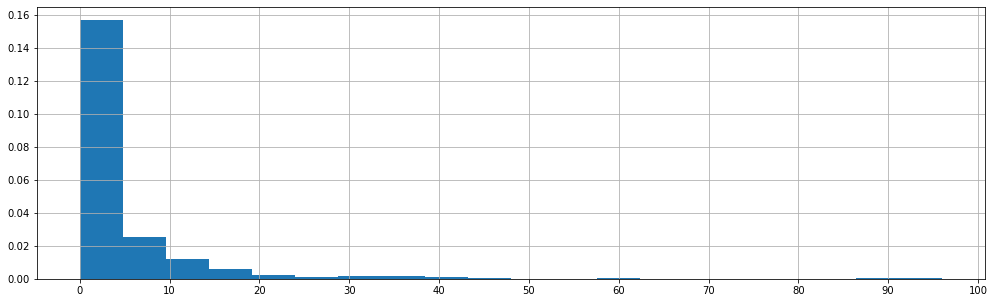

In [111]:
ax = df['total_sales'].hist(density=True, bins=20)
fig = plt.gcf()
fig.set_size_inches(17,5)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))

plt.show()

In [112]:
# boxplot de la colonne total_sales tableau df

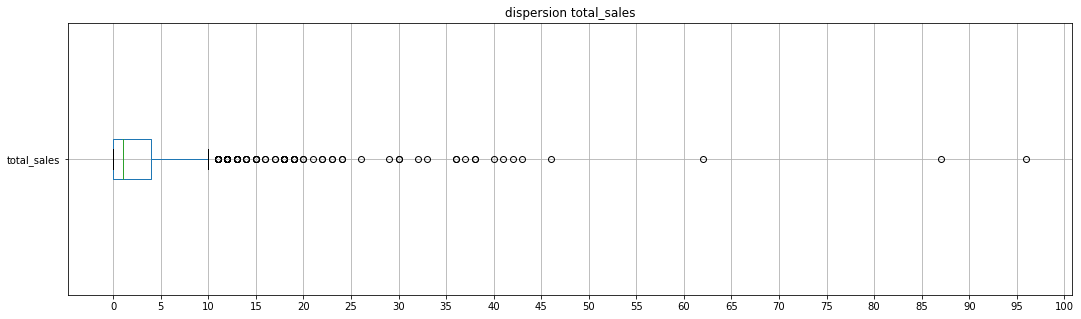

In [113]:
ax = df.boxplot(column='total_sales', vert=False)
plt.title('dispersion total_sales')
fig = plt.gcf()
fig.set_size_inches(18, 5)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

In [114]:
# la boxplot montre la présence d'outliers entre Q3 et le max.
# ils vont tirer la moyenne vers le haut :
# donc la médiane semble être le meilleur choix pour remplacer les valeurs manquantes.

In [115]:
# calcul médiane colonne total_sales tableau df

In [116]:
mediane_total_sales = df['total_sales'].median()
mediane_total_sales

1.0

In [117]:
# calcul moyenne colonne total_sales tableau df

In [118]:
moyenne_total_sales = df['total_sales'].mean()
moyenne_total_sales

4.018232819074334

### séparation du tableau df : lignes avec donnée dans colonne total_sales et lignes sans données dans colonne total_sales

#### tableau avec colonne total_sales renseignée

In [119]:
df_avec_total_sales = df.dropna(subset=['total_sales'])

In [120]:
# vérification

In [121]:
df_avec_total_sales.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count
count,713.000000,713.0,713.000000,713.000000,713.0,713.0,713.0,713.0,713.000000,713.000000,713.0,713.0,713.0
mean,5029.451613,1.0,32.461851,28.754558,0.0,0.0,0.0,0.0,4.018233,1.998597,0.0,0.0,0.0
std,786.694457,0.0,27.817471,48.045830,0.0,0.0,0.0,0.0,8.522835,0.037450,0.0,0.0,0.0
min,3847.000000,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0
25%,4280.000000,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,2.000000,0.0,0.0,0.0
50%,4795.000000,1.0,23.500000,12.000000,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0
75%,5709.000000,1.0,42.100000,35.000000,0.0,0.0,0.0,0.0,4.000000,2.000000,0.0,0.0,0.0
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,2.000000,0.0,0.0,0.0


In [122]:
# vérification par le nombre de lignes :
# nombre de lignes de df_avec_total_sales doit être égal au nombre de lignes de df qui ont une donnée dans colonne total_sales

In [123]:
len(df_avec_total_sales) == lines_with_total_sales

True

In [124]:
# vérification validée

#### tableau avec colonne total_sales non-renseignée

In [125]:
df_sans_total_sales = df[df['total_sales'].isna()]

In [126]:
# vérification

In [127]:
df_sans_total_sales.describe(include='all', datetime_is_numeric=True)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge_0,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
count,112.000000,21.0,112.000000,112.000000,112.000000,112,112,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,112
unique,NaN,21.0,NaN,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,0,0,NaN,1
top,NaN,14648.0,NaN,NaN,NaN,instock,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
freq,NaN,1.0,NaN,NaN,NaN,65,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112
mean,6010.214286,NaN,0.035714,32.121429,12.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4055.000000,NaN,0.000000,8.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4867.750000,NaN,0.000000,20.425000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6325.500000,NaN,0.000000,30.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7084.250000,NaN,0.000000,40.000000,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7329.000000,NaN,1.000000,144.000000,192.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
# vérification par le nombre de lignes :
# le nombre de lignes de df_sans_total_sales doit être égal au nombre de lignes de df qui n'ont pas de donnée dans total_sales

In [129]:
len(df_sans_total_sales) == lines_without_total_sales

True

In [130]:
# vérification validée

# analyse variable prix

In [131]:
# analyse de cette variable avant de chiffrer le CA pour être sur du calcul du CA

In [132]:
# histogramme

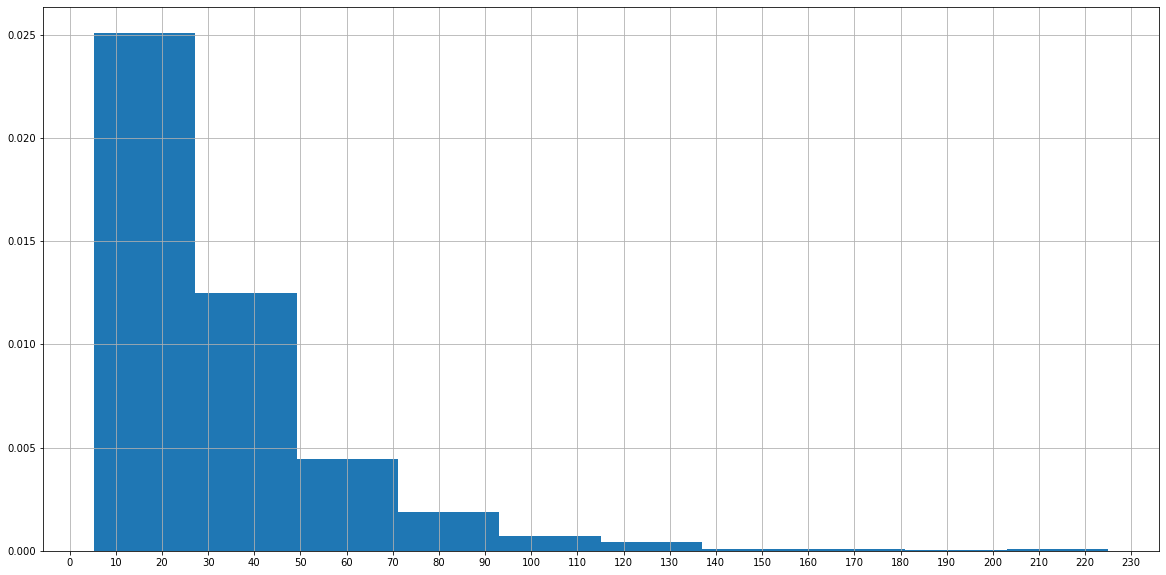

In [133]:
ax = df['price'].hist(density=True)
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))

plt.show()

In [134]:
# boxplot

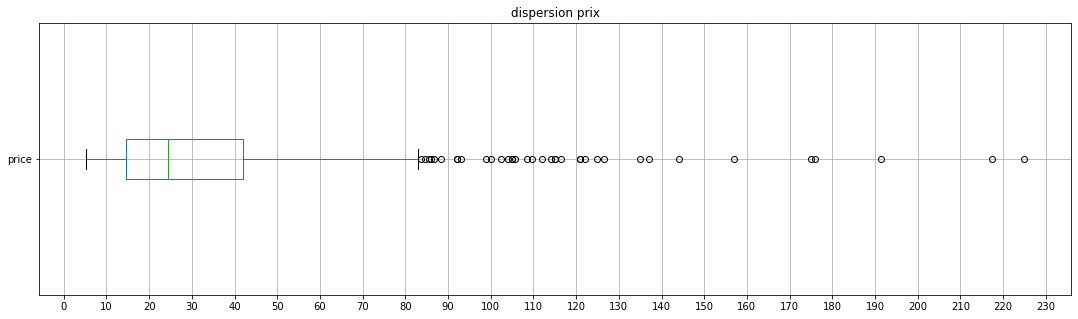

In [135]:
ax = df.boxplot(column='price', vert=False)
plt.title('dispersion prix')
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
plt.show()

In [136]:
# On remarque qu'il y  a des outliers sur le haut de la distribution mais pas sur le bas

In [137]:
# représentation des données : scatter plot avec carte de couleur

D:\logiciels\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


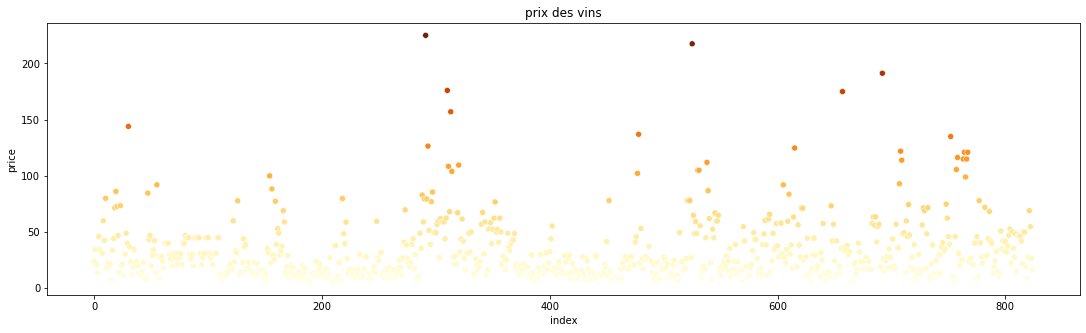

In [138]:
ax = sns.scatterplot(df.index, df['price'], hue=df['price'], palette="YlOrBr", legend=False)
plt.title('prix des vins')
plt.xlabel('index')
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
plt.show()

In [139]:
# calcul du seuil des outliers sur le haut de la distribution

In [140]:
# calcul q1 et q3

In [141]:
df.price.quantile([0.25,0.75])

0.25    14.6
0.75    42.0
Name: price, dtype: float64

In [142]:
# calcul proprement dit du seuil des outliers sur le haut de la distribution :
# Q3 + (Q3 - Q1) * 1.5 = Q3 + écart interquartile * 1.5

In [143]:
42+(42-14.4)*1.5

83.4

In [144]:
# analyse des outliers sur le haut de la distribution

In [145]:
# isolation dans un tableau

In [146]:
temporary_df = df[df['price'] > 83.4].sort_values(by='price', ascending=False)

In [147]:
# nombre d'outliers sur le haut de la distribution

In [148]:
len(temporary_df)

37

In [149]:
# représentation des outliers sur le haut de la distribution : scatter plot avec carte de couleur

D:\logiciels\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


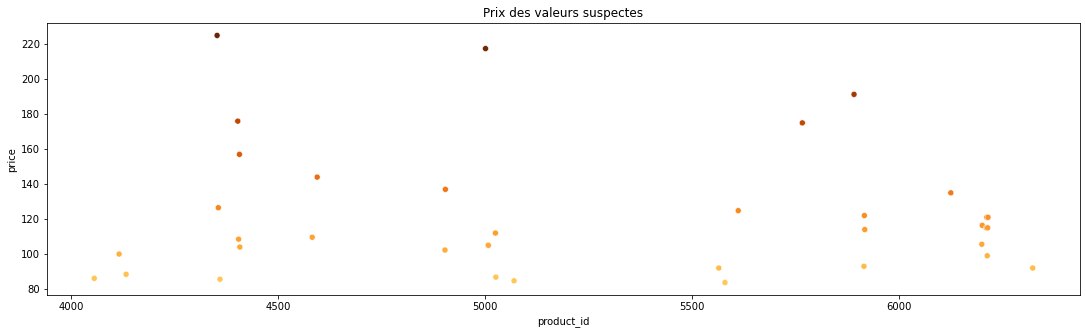

In [150]:
ax = sns.scatterplot(temporary_df['product_id'], temporary_df['price'], hue=df['price'], palette="YlOrBr", legend=False)
plt.title('Prix des valeurs suspectes')
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
plt.show()

In [151]:
# export des outliers pour saisir les prix provenant d'autres sites web sur Excel

In [152]:
temporary_df.to_excel('price_upper_fences.xlsx')

In [153]:
# import des outliers avec comparaison des prix

In [154]:
comparaison = pd.read_excel('comparaison_vins.xlsx', index_col=0)

In [155]:
# ajout des colonnes différence de prix et variation

In [156]:
comparaison['difference_prix'] = comparaison['price']-comparaison['price on internet']
comparaison['variation'] = (comparaison['difference_prix'] / comparaison['price'])

In [157]:
# vérification et liste des prix des valeurs suspectes (prix du dataframe et prix trouvés sur Internet)

In [158]:
comparaison

,product_id,id_web,price,post_title,price on internet,website,diff,variation,difference_prix
208,4352,15940.0,225.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.00,vivino.com,0.00,0.000000,0.00
460,5001,14581.0,217.5,David Duband Charmes-Chambertin Grand Cru 2014,199.00,millesima.fr,18.50,0.085057,18.50
635,5892,14983.0,191.3,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.30,nasti.vin,0.00,0.000000,0.00
227,4402,3510.0,176.0,Cognac Frapin VIP XO,169.00,premiersgrandscrus.com,7.00,0.039773,7.00
598,5767,15185.0,175.0,Camille Giroud Clos de Vougeot 2016,175.00,nasti.vin,0.00,0.000000,0.00
230,4406,7819.0,157.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,145.00,whisky.fr,12.00,0.076433,12.00
242,4594,NaN,144.0,NaN,144.00,"vérification impossible, nom du vin pas dispon...",0.00,0.000000,0.00
411,4904,14220.0,137.0,Domaine Des Croix Corton Charlemagne Grand Cru...,120.00,idealwine.com,17.00,0.124088,17.00
697,6126,14923.0,135.0,Champagne Gosset Célébris Vintage 2007,159.95,plus-de-bulles.com,-24.95,-0.184815,-24.95
210,4355,12589.0,126.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,157.90,https://www.lesbellescaves.fr/,-31.40,-0.248221,-31.40


In [159]:
comparaison.describe()

,product_id,id_web,price,price on internet,diff,variation,difference_prix
count,37.000000,33.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,5248.567568,13116.454545,120.994595,124.931351,-3.936757,-0.037285,-3.936757
std,770.750916,3606.541878,35.759536,36.428897,15.419319,0.131222,15.419319
min,4055.000000,3507.000000,83.700000,78.100000,-49.600000,-0.426117,-49.600000
25%,4407.000000,12790.000000,99.000000,93.000000,-7.730000,-0.073201,-7.730000
50%,5026.000000,14220.000000,112.000000,119.000000,0.000000,0.000000,0.000000
75%,5918.000000,14923.000000,126.500000,145.000000,3.570000,0.032258,3.570000
max,6324.000000,19822.000000,225.000000,225.000000,18.500000,0.134615,18.500000


In [160]:
# pour 4 valeurs, pas de donnée dans colonne id_web :
# donc on ne dispose pas du nom du produit renseigné dans tableau web :
# la colonne 'price on internet' a été renseignéee par défaut avec la même valeur...
# que dans la colonne price pour ne pas fausser l'analyse.

# 37 lignes ; colonnes price, price on internet, difference_prix et variation remplies à 100% :
# vérification validée

In [161]:
# moyenne des différences = - 3.94 €
# moyennes des variations = - 4 %

In [162]:
# les outliers sont des valeurs atypiques mais pas des valeurs aberrantes

# calcul du chiffre d'affaires sans données manquantes

### création de la colonne turnover

In [163]:
df_avec_total_sales['turnover'] = df_avec_total_sales['total_sales'] * df_avec_total_sales['price']

<ipython-input-163-f6ebf0a210c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avec_total_sales['turnover'] = df_avec_total_sales['total_sales'] * df_avec_total_sales['price']


### total chiffre d'affaires

In [164]:
ca_sans_reconstitution = df_avec_total_sales['turnover'].sum()
ca_sans_reconstitution

70568.6

### calcul du chiffre d'affaires avec estimation pour les données manquantes sur le nombres de ventes

In [165]:
# calcul avec la médiane

In [166]:
ca_mediane = df_sans_total_sales['price'].sum()
ca_mediane

3597.6000000000004

In [167]:
# calcul avec la moyenne

In [168]:
ca_moyenne = df_sans_total_sales['price'].sum() * moyenne_total_sales
ca_moyenne

14455.994389901825

In [169]:
# comme prévu, la reconstitution avec la moyenne tire le CA reconstitué vers le haut :
# donc prise en compte de la médiane.
# elle paraît être un bon moyen d'estimer le CA en minimisant le risque d'erreur.

### calcul du chiffre d'affaires avec estimation pour les données manquantes

In [170]:
ca_sans_reconstitution+ca_mediane

74166.20000000001

In [171]:
# pourcentage de CA reconstitué

In [172]:
ca_mediane / ca_sans_reconstitution * 100

5.0980180987011225

In [173]:
# le CA reconstitué représente 5% du CA dont on est sûr